In [1]:
import os
import sys
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), "../src"))
sys.path.insert(0, project_root)

import gf_selection

In [2]:
pdcs = 0.02  # accepted rate of decompression sickness (DCS)
he_percentage = 0
o2_percentage = 21

In [3]:
T_values = np.linspace(30, 120, 20)
D_values = np.linspace(20, 60, 20)
# o2_values = np.linspace(18, 36, 5)
o2_values = [21]
# pdcs_values =  np.linspace(0.01, 0.05, 3)  # Values under 0.01 do not work well. What the paper suggests as possible range?
pdcs_values = [0.01, 0.02, 0.03, 0.05]

combinations = [
    (T, D, o2, pdcs) 
    for T in T_values
    for D in D_values
    for o2 in o2_values
    for pdcs in pdcs_values
]
df = pd.DataFrame(combinations, columns=['T', 'D', 'o2', 'pdcs'])

In [4]:
df['prt'] = df['D']/10+1 * np.sqrt(df['T'])
df['TDT'] = df.apply(lambda x: gf_selection.get_standair_tdt(x['D'], x['T'], x['pdcs']), axis=1)

In [5]:
df['prt'] = df['D']/10+1 * np.sqrt(df['T'])
df['prt2'] = df['D']/10+1 * np.sqrt(df['T'] + df['TDT'])

<Axes: xlabel='prt2'>

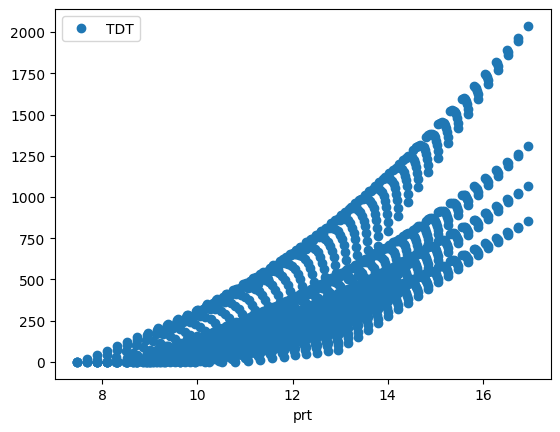

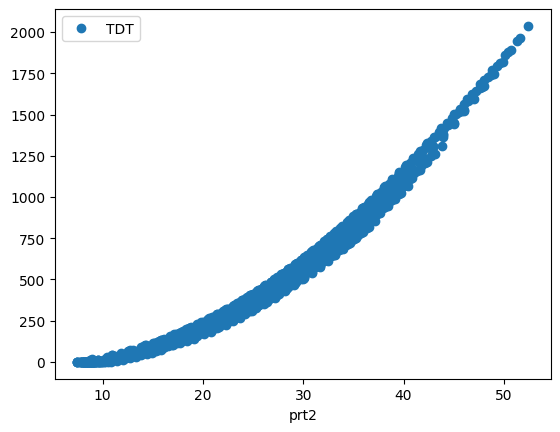

In [6]:
# TODO: Is PRT defined to be just from bottom time or also from deco?
df.plot('prt', 'TDT', marker="o", linewidth=0)
df.plot('prt2', 'TDT', marker="o", linewidth=0)

In [7]:
# Filter out unnecessary long dives to speed up calculations.
df = df[df['TDT']<500].copy()

In [8]:
df

,T,D,o2,pdcs,prt,TDT,prt2
0,30.0,20.000000,21,0.01,7.477226,0.000000,7.477226
1,30.0,20.000000,21,0.02,7.477226,0.000000,7.477226
2,30.0,20.000000,21,0.03,7.477226,0.000000,7.477226
3,30.0,20.000000,21,0.05,7.477226,0.000000,7.477226
4,30.0,22.105263,21,0.01,7.687752,15.165784,8.931076
...,...,...,...,...,...,...,...
1550,120.0,34.736842,21,0.03,14.428135,469.868631,27.760895
1551,120.0,34.736842,21,0.05,14.428135,359.282508,25.366206
1555,120.0,36.842105,21,0.05,14.638662,400.440342,26.497372
1559,120.0,38.947368,21,0.05,14.849188,441.598176,27.592800


In [9]:
from importlib import reload
gf_selection = reload(gf_selection)

In [10]:
df = gf_selection.parallelize_dataframe(df, gf_selection.fit_gf_to_tdt_df)

/home/heikki/.pyenv/versions/3.13.1/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Text(0, 0.5, 'GF high')

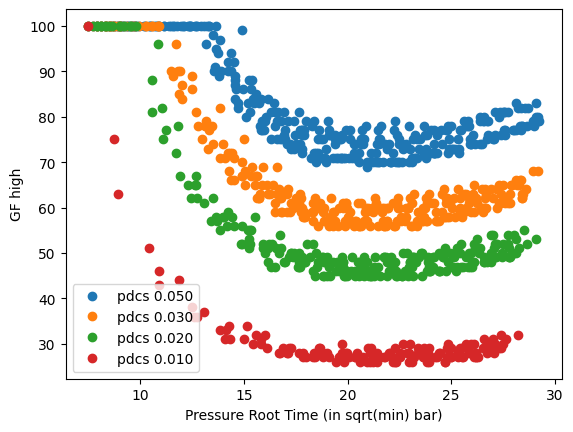

In [11]:
ax = plt.gca()
for pdcs, data in sorted(df.groupby('pdcs'), key=lambda x: x[0], reverse=True):
    data.plot('prt2', 'gf_high', marker="o", linewidth=0, label=f"pdcs {pdcs:.3f}", ax=ax)
plt.legend(loc='lower left')
plt.xlabel('Pressure Root Time (in sqrt(min) bar)')
plt.ylabel('GF high')

# Graph should be similar as in Fraedrich, Doug. "Evidence-Based Study on the Setting of High Gradient Factor." (2024).

In [12]:
# TODO: 
# Appropriate settings for GF-Hi needed for higher PrT levels found in decompression diving was
# estimated using a second model, the Tissue Bubble Dynamics Model, TBDM mentioned in Table 1 above
# [Ref 12].
# 12. Gernhardt, M. “Development and evaluation of a decompression stress index based on
# tissue bubble dynamics.” Ph.D. dissertation, University of Pennsylvania, 1991

# These results are consistent with recent findings of Doolette [Ref 14.]
# 14. Doolette, D., “Advances in Decompression Theory and Practice” Rebreather Forum 4, 2023
# https://gue.tv/programs/decompression-theory-ccr-diving-rebreather-safe-practices